# ***Libraries Used***

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
# Data-frame manipulation and visualization
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt


In [4]:
# Pre-Processing and Data Wrangling Libraries
from sklearn.preprocessing import ( StandardScaler, MinMaxScaler, 
                                    LabelEncoder, OneHotEncoder, OrdinalEncoder
                                    )

from sklearn.model_selection import (   train_test_split, 
                                        StratifiedKFold,
                                        cross_val_score, validation_curve, learning_curve, LearningCurveDisplay
                                    )


In [139]:
# Pipelines and Models

from sklearn.compose import ColumnTransformer

from sklearn.model_selection import GridSearchCV

from sklearn.pipeline import(   
                                Pipeline,
                                make_pipeline
                            )

from sklearn.naive_bayes import GaussianNB

from sklearn.ensemble import(   RandomForestClassifier, VotingClassifier,
                                AdaBoostClassifier, StackingClassifier
                            )

from sklearn.neighbors import KNeighborsClassifier

from sklearn.tree import DecisionTreeClassifier

from sklearn.svm import SVC

# Loading and first impressions of dataset

After conducting a prior analysis and thorough research, we discovered that the dataset was poorly split into training and testing sets and exhibited significant class imbalance. To address this, we will merge the training and testing sets and later perform a more appropriate split.

In [6]:
df= pd.concat([
    pd.read_csv('customer_churn_dataset-training-master.csv'),
    pd.read_csv('customer_churn_dataset-testing-master.csv')
],
    axis=0)

In [7]:
df.reset_index(drop= True, inplace= True)

In [8]:
df.head(10)

,CustomerID,Age,Gender,Tenure,Usage Frequency,Support Calls,Payment Delay,Subscription Type,Contract Length,Total Spend,Last Interaction,Churn
0,2.0,30.0,Female,39.0,14.0,5.0,18.0,Standard,Annual,932.0,17.0,1.0
1,3.0,65.0,Female,49.0,1.0,10.0,8.0,Basic,Monthly,557.0,6.0,1.0
2,4.0,55.0,Female,14.0,4.0,6.0,18.0,Basic,Quarterly,185.0,3.0,1.0
3,5.0,58.0,Male,38.0,21.0,7.0,7.0,Standard,Monthly,396.0,29.0,1.0
4,6.0,23.0,Male,32.0,20.0,5.0,8.0,Basic,Monthly,617.0,20.0,1.0
5,8.0,51.0,Male,33.0,25.0,9.0,26.0,Premium,Annual,129.0,8.0,1.0
6,9.0,58.0,Female,49.0,12.0,3.0,16.0,Standard,Quarterly,821.0,24.0,1.0
7,10.0,55.0,Female,37.0,8.0,4.0,15.0,Premium,Annual,445.0,30.0,1.0
8,11.0,39.0,Male,12.0,5.0,7.0,4.0,Standard,Quarterly,969.0,13.0,1.0
9,12.0,64.0,Female,3.0,25.0,2.0,11.0,Standard,Quarterly,415.0,29.0,1.0


In [9]:
df.describe()

,CustomerID,Age,Tenure,Usage Frequency,Support Calls,Payment Delay,Total Spend,Last Interaction,Churn
count,505206.000000,505206.000000,505206.000000,505206.000000,505206.000000,505206.000000,505206.000000,505206.000000,505206.000000
mean,200779.451782,39.704172,31.350435,15.714825,3.833317,13.496843,620.072766,14.610581,0.555203
std,137241.343095,12.670577,17.237482,8.619323,3.133603,8.451187,245.319256,8.608286,0.496944
min,1.000000,18.000000,1.000000,1.000000,0.000000,0.000000,100.000000,1.000000,0.000000
25%,63827.250000,29.000000,16.000000,8.000000,1.000000,6.000000,446.000000,7.000000,0.000000
50%,193039.500000,40.000000,32.000000,16.000000,3.000000,13.000000,648.900000,14.000000,1.000000
75%,321645.750000,49.000000,46.000000,23.000000,6.000000,20.000000,824.000000,22.000000,1.000000
max,449999.000000,65.000000,60.000000,30.000000,10.000000,30.000000,1000.000000,30.000000,1.000000


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 505207 entries, 0 to 505206
Data columns (total 12 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   CustomerID         505206 non-null  float64
 1   Age                505206 non-null  float64
 2   Gender             505206 non-null  object 
 3   Tenure             505206 non-null  float64
 4   Usage Frequency    505206 non-null  float64
 5   Support Calls      505206 non-null  float64
 6   Payment Delay      505206 non-null  float64
 7   Subscription Type  505206 non-null  object 
 8   Contract Length    505206 non-null  object 
 9   Total Spend        505206 non-null  float64
 10  Last Interaction   505206 non-null  float64
 11  Churn              505206 non-null  float64
dtypes: float64(9), object(3)
memory usage: 46.3+ MB


# ***EDA, Visualization and Preprocessing***

In [11]:
df.isnull().sum()

CustomerID           1
Age                  1
Gender               1
Tenure               1
Usage Frequency      1
Support Calls        1
Payment Delay        1
Subscription Type    1
Contract Length      1
Total Spend          1
Last Interaction     1
Churn                1
dtype: int64

**It seems that there is only a single row of null values in our dataset. Lets try and verify this**

In [12]:
df[df.isnull().any(axis=1)]

,CustomerID,Age,Gender,Tenure,Usage Frequency,Support Calls,Payment Delay,Subscription Type,Contract Length,Total Spend,Last Interaction,Churn
199295,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


**This shows that entry number 199295 was null. Now the most appropriate way to handle the null row is to drop it. This is because it is a single row in a huge dataset which would not make any difference whatsoever**

In [13]:
df= df.dropna()

In [14]:
df.isnull().sum()

CustomerID           0
Age                  0
Gender               0
Tenure               0
Usage Frequency      0
Support Calls        0
Payment Delay        0
Subscription Type    0
Contract Length      0
Total Spend          0
Last Interaction     0
Churn                0
dtype: int64

In [15]:
df.shape

(505206, 12)

Checking for any duplicates

In [16]:
df.duplicated().sum()

0

No duplicates present

# Categorical Columns (Gender, Subscription Type, Contract Length)

In [17]:
categorical_cols= df.select_dtypes(include='object').columns

In [18]:
categorical_cols

Index(['Gender', 'Subscription Type', 'Contract Length'], dtype='object')

In [19]:
df[categorical_cols].describe()

,Gender,Subscription Type,Contract Length
count,505206,505206,505206
unique,2,3,3
top,Male,Standard,Annual
freq,280273,170630,198608


In [20]:
for i in categorical_cols:
    print(df[i].value_counts())
    print()

Gender
Male      280273
Female    224933
Name: count, dtype: int64

Subscription Type
Standard    170630
Premium     170099
Basic       164477
Name: count, dtype: int64

Contract Length
Annual       198608
Quarterly    197364
Monthly      109234
Name: count, dtype: int64



In [21]:
df.groupby(['Gender'], as_index= False)['Churn'].mean()

,Gender,Churn
0,Female,0.648944
1,Male,0.479971


over 64% of all females opted to churn while arouund 49% of all males opted to churn. 

In [22]:
df.groupby(['Subscription Type'], as_index= False)['Churn'].mean()


,Subscription Type,Churn
0,Basic,0.568870
1,Premium,0.547522
2,Standard,0.549686


All 3 subscription types seem to have a pretty similar Churn rate. In other words, all 3 subscription type customer groups seem to have a higher likeliness to churn

In [23]:
df.groupby(['Contract Length'], as_index= False)['Churn'].mean()


,Contract Length,Churn
0,Annual,0.460913
1,Monthly,0.901963
2,Quarterly,0.458169


Customers with a Monthly contract are around 90% likely to churn!.. The Annual and Quarterly contract length customers are much closer

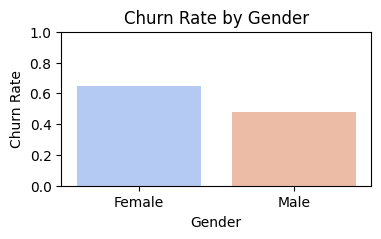

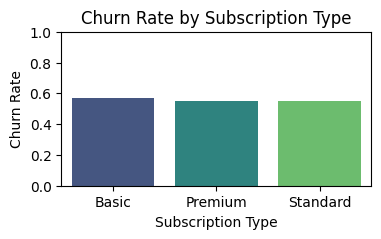

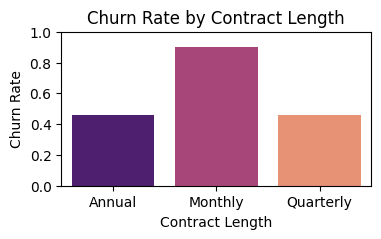

In [24]:
data = {
    'Gender': ['Female', 'Male'],
    'Churn': [0.648944, 0.479971]
}
df_gender = pd.DataFrame(data)

data = {
    'Subscription Type': ['Basic', 'Premium', 'Standard'],
    'Churn': [0.568870, 0.547522, 0.549686]
}
df_subscription = pd.DataFrame(data)

data = {
    'Contract Length': ['Annual', 'Monthly', 'Quarterly'],
    'Churn': [0.460913, 0.901963, 0.458169]
}
df_contract = pd.DataFrame(data)

plt.figure(figsize=(4, 2))
sns.barplot(x='Gender', y='Churn', data=df_gender, palette='coolwarm')
plt.title('Churn Rate by Gender')
plt.ylabel('Churn Rate')
plt.ylim(0, 1)
plt.show()


plt.figure(figsize=(4, 2))
sns.barplot(x='Subscription Type', y='Churn', data=df_subscription, palette='viridis')
plt.title('Churn Rate by Subscription Type')
plt.ylabel('Churn Rate')
plt.ylim(0, 1)
plt.show()

plt.figure(figsize=(4, 2))
sns.barplot(x='Contract Length', y='Churn', data=df_contract, palette='magma')
plt.title('Churn Rate by Contract Length')
plt.ylabel('Churn Rate')
plt.ylim(0, 1)
plt.show()


Our suspicion for whether or not subscription type gives any useful info has already increased

Let us consider combining the Contract Length and Subscription type column to see if doing so reveals more informative patterns compared to patterns shown by subscription type alone!

In [25]:

subscription_map = {
    'Basic': 'Bsc',
    'Premium': 'Prm',
    'Standard': 'Std'
}

contract_map = {
    'Annual': 'Ann',
    'Monthly': 'Mon',
    'Quarterly': 'Qua'
}

df['Subscription_Contract'] = df['Subscription Type'].map(subscription_map) + '-' + df['Contract Length'].map(contract_map)


In [26]:
sub_cont=df.groupby(['Subscription_Contract'], as_index= False)['Churn'].mean()
sub_cont


,Subscription_Contract,Churn
0,Bsc-Ann,0.474148
1,Bsc-Mon,0.903056
2,Bsc-Qua,0.473478
3,Prm-Ann,0.454180
4,Prm-Mon,0.900214
5,Prm-Qua,0.448290
6,Std-Ann,0.454912
7,Std-Mon,0.902623
8,Std-Qua,0.453491


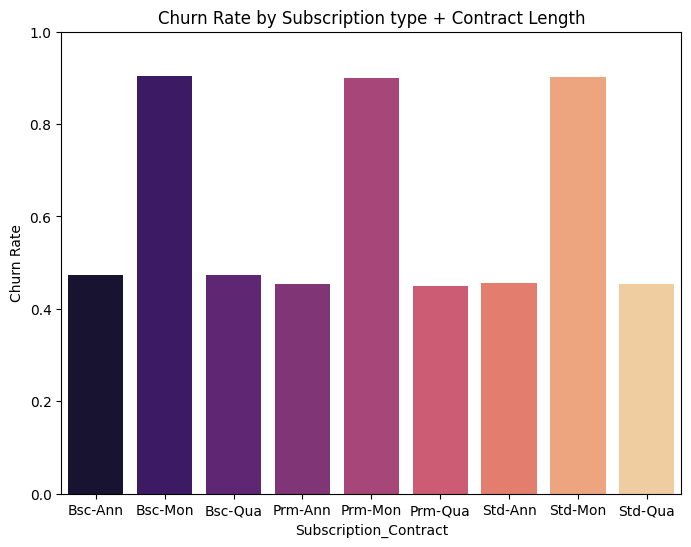

In [27]:
plt.figure(figsize=(8, 6))
sns.barplot(x='Subscription_Contract', y='Churn', data=sub_cont, palette='magma')
plt.title('Churn Rate by Subscription type + Contract Length')
plt.ylabel('Churn Rate')
plt.ylim(0, 1)
plt.show()

In [28]:
df['Subscription_Contract'].value_counts()

Subscription_Contract
Std-Ann    67202
Std-Qua    67095
Prm-Ann    66903
Prm-Qua    66718
Bsc-Ann    64503
Bsc-Qua    63551
Prm-Mon    36478
Bsc-Mon    36423
Std-Mon    36333
Name: count, dtype: int64

# Univariate Analysis

# Support Calls

In [29]:
sup_calls=df.groupby(['Support Calls'], as_index= False)['Churn'].mean()
sup_calls

,Support Calls,Churn
0,0.0,0.298803
1,1.0,0.298676
2,2.0,0.309850
3,3.0,0.402614
4,4.0,0.553715
5,5.0,0.874933
6,6.0,0.913391
7,7.0,0.917227
8,8.0,0.914062
9,9.0,0.914009


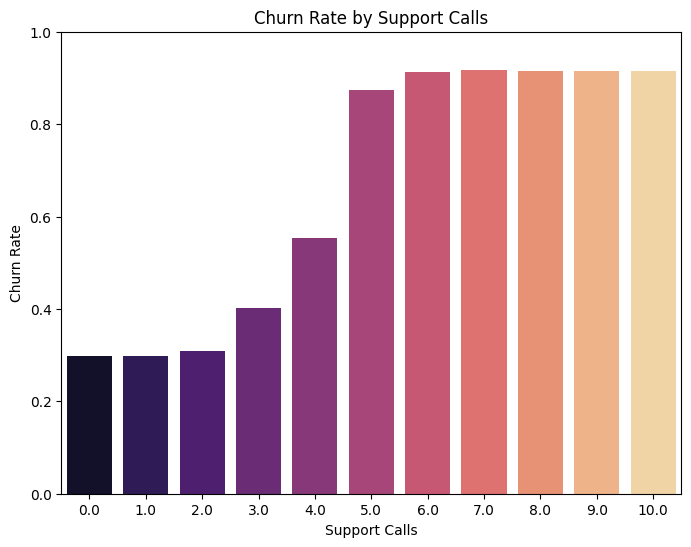

In [30]:
plt.figure(figsize=(8, 6))
sns.barplot(x='Support Calls', y='Churn', data=sup_calls, palette='magma')
plt.title('Churn Rate by Support Calls')
plt.ylabel('Churn Rate')
plt.ylim(0, 1)
plt.show()

This shows that as support calls increase, the churn rate also increases, and customers who have atleast 6 support calls are 100% likely to churn

# Age

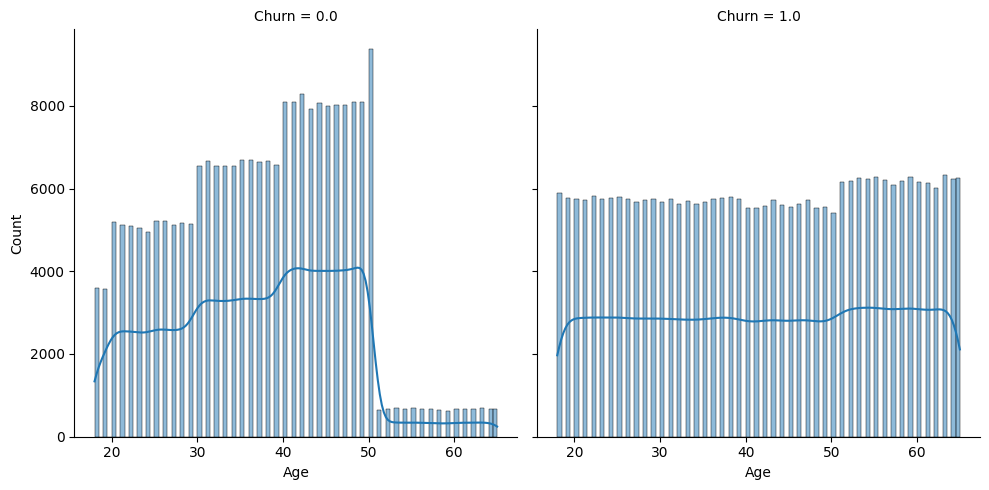

In [31]:
sns.displot(data= df, x= df['Age'], col= df['Churn'], kde= True)
plt.show()

Customers in their 30s and 40s seem to have a higher likelihood of staying (Churn = 0) but there is a huge drop in ages beyond 50 which shows older people are least likely to stay.
Churn = 1 occurs relatively highly for older people (50+ Age) further strengthening the claim. 

Lets divide Customers into 5 groups by their ages

In [32]:
df['Age_Cut']= pd.qcut(df['Age'], 5)


In [33]:
age_cut=df.groupby(['Age_Cut'], as_index= False)['Churn'].mean()
age_cut

,Age_Cut,Churn
0,"(17.999, 27.0]",0.544968
1,"(27.0, 36.0]",0.475025
2,"(36.0, 43.0]",0.431427
3,"(43.0, 51.0]",0.436517
4,"(51.0, 65.0]",0.902213


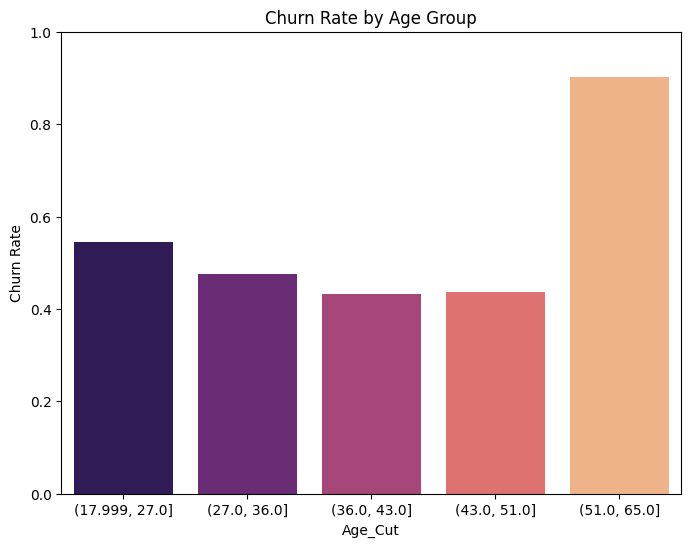

In [34]:
plt.figure(figsize=(8, 6))
sns.barplot(x='Age_Cut', y='Churn', data=age_cut, palette='magma')
plt.title('Churn Rate by Age Group')
plt.ylabel('Churn Rate')
plt.ylim(0, 1)
plt.show()

So Lets rework the Age and Age cut columns now as the grouping of ages into 5 groups captures the pattern better!

Also note, the lower age limit for the customers in the data seems to be 18, and the upper limit seems to be 65, in other words, all customers seem to be >= 18 years old or <= 65 years old.

In [35]:
df.loc[(df['Age'] > 17.999) & (df['Age'] <= 27), 'Age'] = 0
df.loc[(df['Age'] > 27) & (df['Age'] <= 35), 'Age'] = 1
df.loc[(df['Age'] > 35) & (df['Age'] <= 43), 'Age'] = 2
df.loc[(df['Age'] > 43) & (df['Age'] <= 50), 'Age'] = 3
df.loc[(df['Age'] > 50) & (df['Age'] <= 65), 'Age'] = 4
df.loc[df['Age'] > 65, 'Age']



Series([], Name: Age, dtype: float64)

In [36]:
df['Age'].value_counts()

Age
0.0    105786
2.0    104352
4.0    103012
3.0     96666
1.0     95390
Name: count, dtype: int64

# Usage Frequency

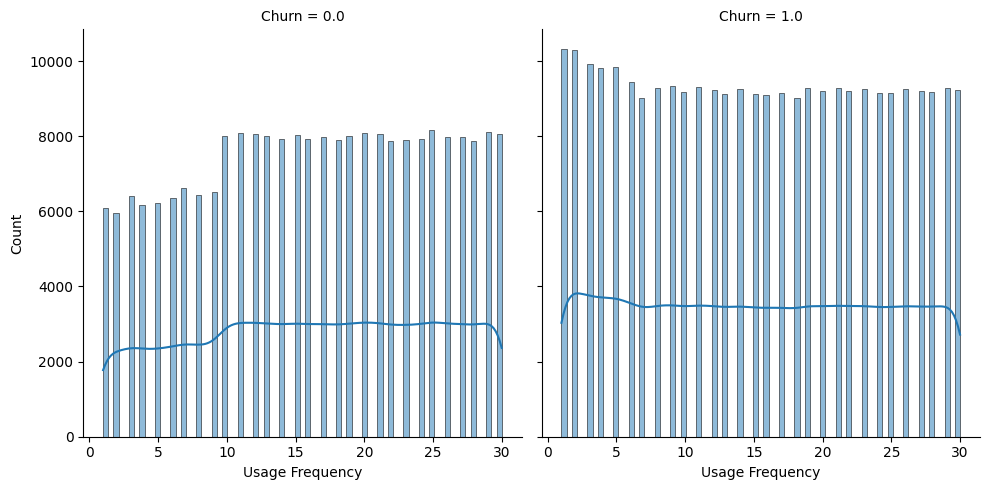

In [37]:
sns.displot(data= df, x= df['Usage Frequency'], col= df['Churn'], kde= True)
plt.show()

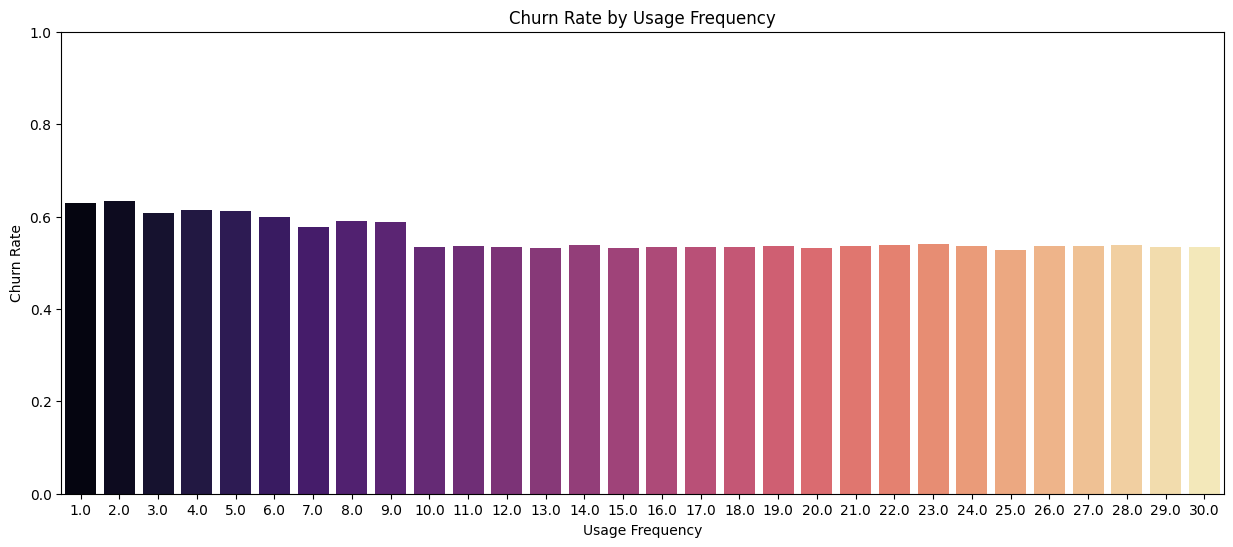

In [38]:
plt.figure(figsize=(15, 6))
sns.barplot(x='Usage Frequency', y='Churn', data= df.groupby(['Usage Frequency'], as_index= False)['Churn'].mean(), palette='magma')
plt.title('Churn Rate by Usage Frequency')
plt.ylabel('Churn Rate')
plt.ylim(0, 1)
plt.show()

Customers with a higher usage frequency are more likely to stay.

# Tenure

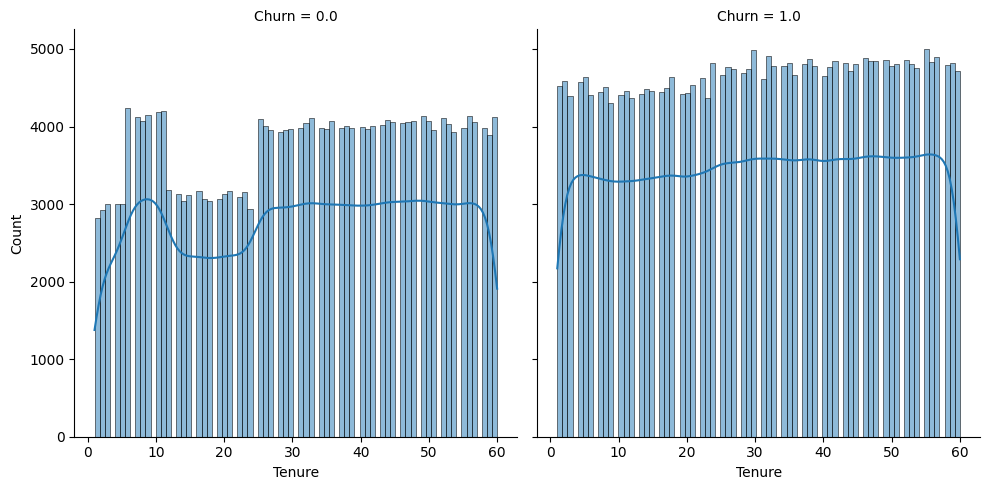

In [39]:
sns.displot(data= df, x= df['Tenure'], col= df['Churn'], kde= True)
plt.show()

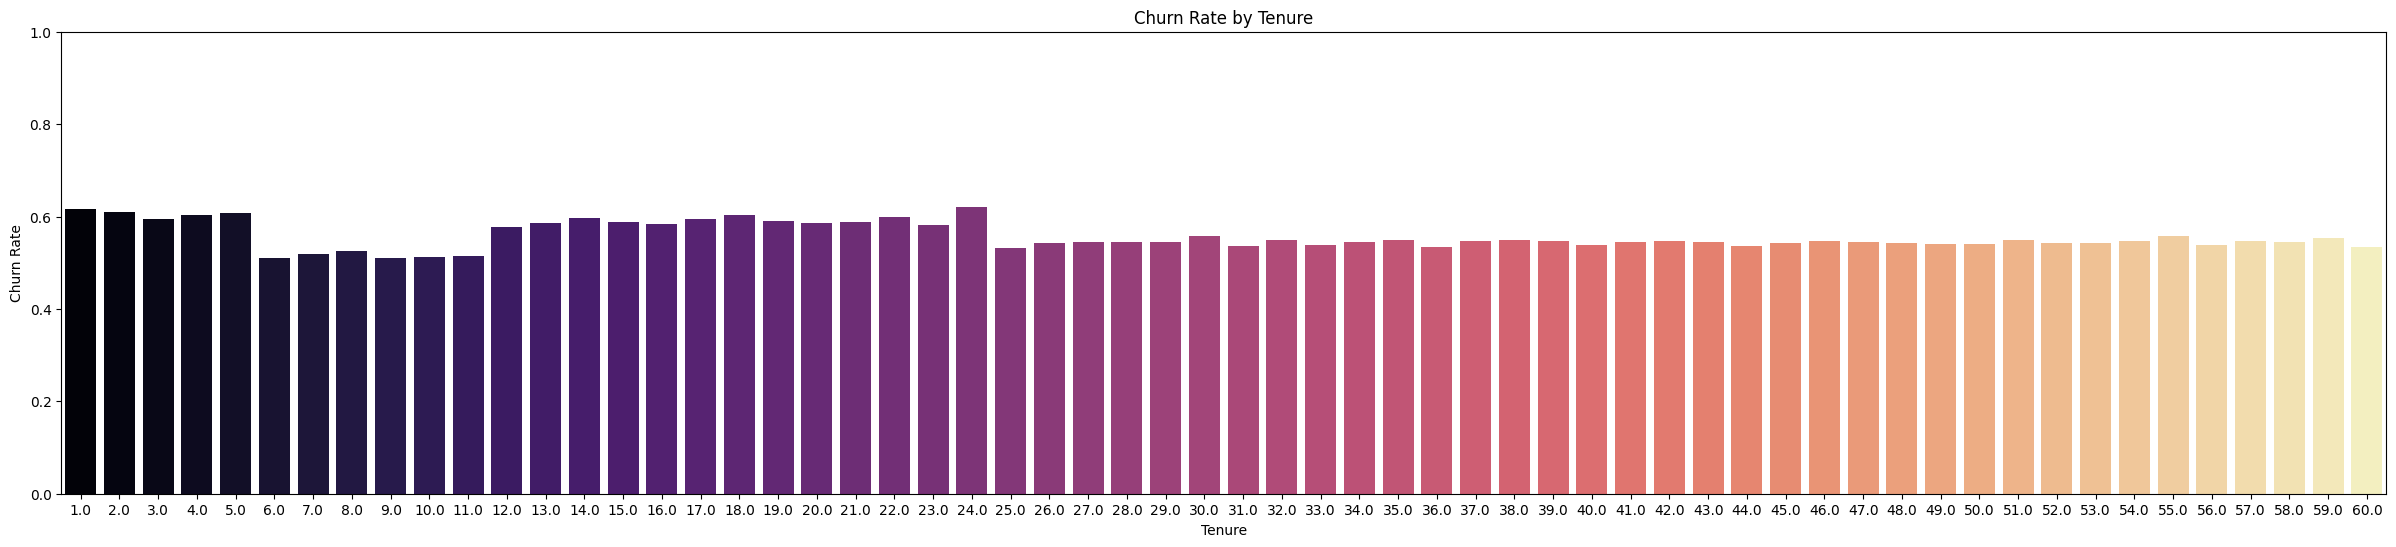

In [40]:
plt.figure(figsize=(30, 6))
sns.barplot(x='Tenure', y='Churn', data= df.groupby(['Tenure'], as_index= False)['Churn'].mean(), palette='magma')
plt.title('Churn Rate by Tenure')
plt.ylabel('Churn Rate')
plt.ylim(0, 1)
plt.show()

Customers with longer tenure (25+ months) are **comparitively** more likely to stay  as seen in the above figures. A peak in the displot for churn=0 is also noticed for customers with tenure around 5-12 months.

In [41]:
df['Tenure_groups']= pd.qcut(df['Tenure'],10)

In [42]:

Tenure_cut=df.groupby(['Tenure_groups'], as_index= False)['Churn'].mean()
Tenure_cut

,Tenure_groups,Churn
0,"(0.999, 7.0]",0.577610
1,"(7.0, 13.0]",0.535953
2,"(13.0, 20.0]",0.591843
3,"(20.0, 26.0]",0.576006
4,"(26.0, 32.0]",0.546204
5,"(32.0, 38.0]",0.543658
6,"(38.0, 43.0]",0.544677
7,"(43.0, 49.0]",0.542037
8,"(49.0, 55.0]",0.546402
9,"(55.0, 60.0]",0.543766


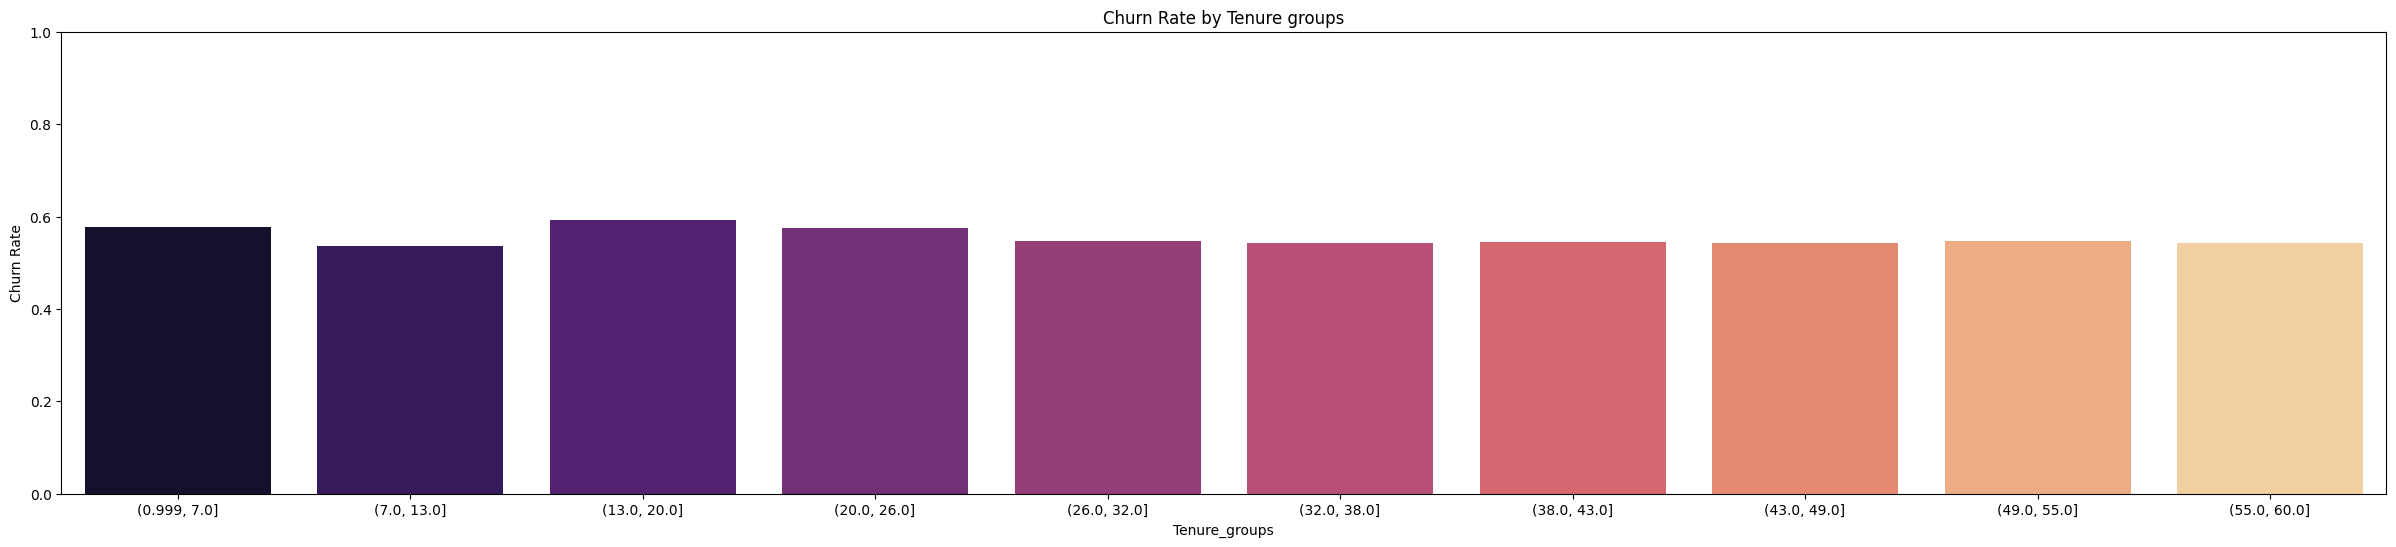

In [43]:
plt.figure(figsize=(30, 6))
sns.barplot(x='Tenure_groups', y='Churn', data= df.groupby(['Tenure_groups'], as_index= False)['Churn'].mean(), palette='magma')
plt.title('Churn Rate by Tenure groups')
plt.ylabel('Churn Rate')
plt.ylim(0, 1)
plt.show()

In [44]:
df.loc[(df['Tenure'] > 0.999) & (df['Tenure'] <= 7.0), 'Tenure'] = 0
df.loc[(df['Tenure'] > 7.0) & (df['Tenure'] <= 13.0), 'Tenure'] = 1
df.loc[(df['Tenure'] > 13.0) & (df['Tenure'] <= 20.0), 'Tenure'] = 2
df.loc[(df['Tenure'] > 20.0) & (df['Tenure'] <= 26.0), 'Tenure'] = 3
df.loc[(df['Tenure'] > 26.0) & (df['Tenure'] <= 32.0), 'Tenure'] = 4
df.loc[(df['Tenure'] > 32.0) & (df['Tenure'] <= 38.0), 'Tenure'] = 5
df.loc[(df['Tenure'] > 38.0) & (df['Tenure'] <= 43.0), 'Tenure'] = 6
df.loc[(df['Tenure'] > 43.0) & (df['Tenure'] <= 49.0), 'Tenure'] = 7
df.loc[(df['Tenure'] > 49.0) & (df['Tenure'] <= 55.0), 'Tenure'] = 8
df.loc[(df['Tenure'] > 55.0) & (df['Tenure'] <= 60.0), 'Tenure'] = 9
df.loc[(df['Tenure'] > 60), 'Tenure']

Series([], Name: Tenure, dtype: float64)

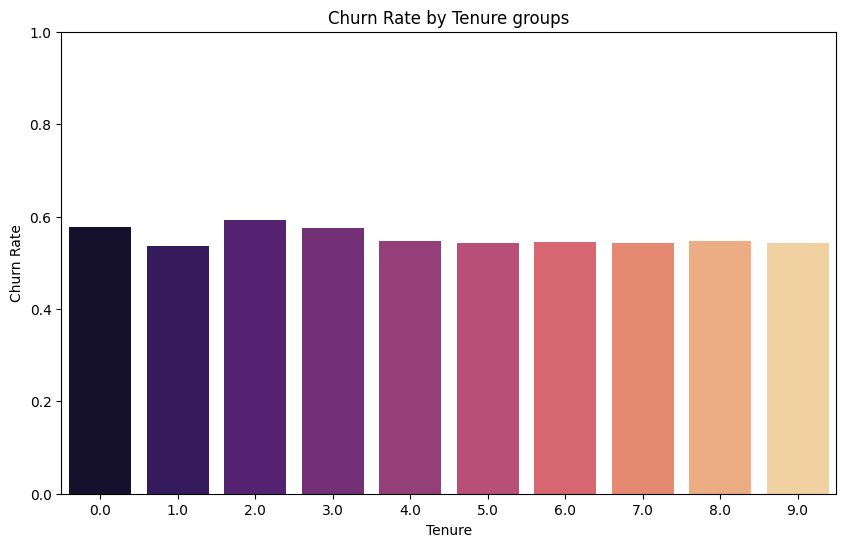

In [45]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Tenure', y='Churn', data= df.groupby(['Tenure'], as_index= False)['Churn'].mean(), palette='magma')
plt.title('Churn Rate by Tenure groups')
plt.ylabel('Churn Rate')
plt.ylim(0, 1)
plt.show()

# Payment Delay

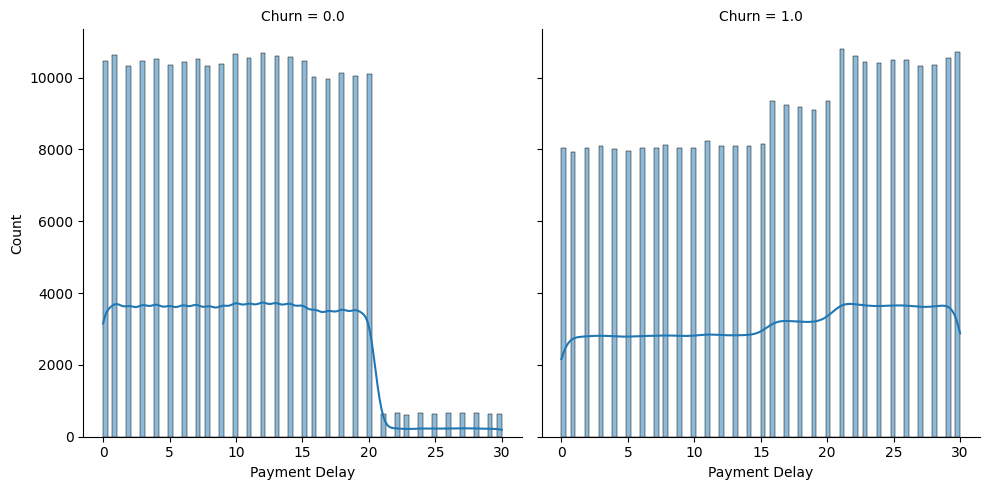

In [46]:
sns.displot(data= df, x= df['Payment Delay'], col= df['Churn'], kde= True)
plt.show()

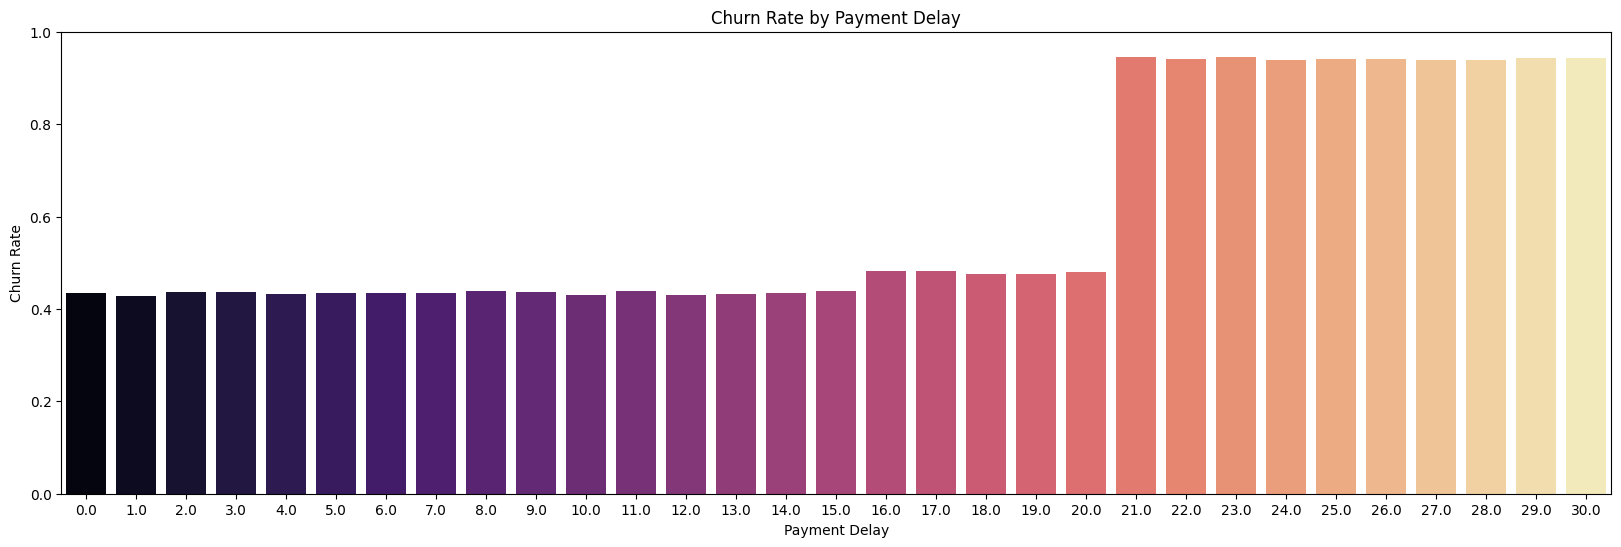

In [47]:
plt.figure(figsize=(20, 6))
sns.barplot(x='Payment Delay', y='Churn', data= df.groupby(['Payment Delay'], as_index= False)['Churn'].mean(), palette='magma')
plt.title('Churn Rate by Payment Delay')
plt.ylabel('Churn Rate')
plt.ylim(0, 1)
plt.show()

This might imply that a delay in payment of more then 20 days results in customer churns. 

# Total Spend

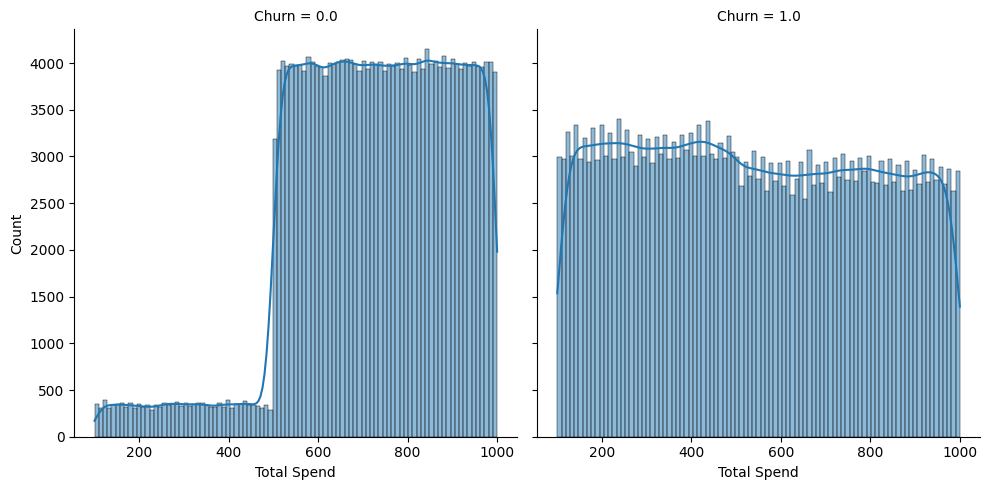

In [48]:
sns.displot(data= df, x= df['Total Spend'], col= df['Churn'], kde= True)
plt.show()

Customers who have spend more then around $500 seem to stay (Churn =0). 
For customer who do churn (Churn=1), there is a minor drop in churn beyond $500 total spend...

In [49]:
df['Total_spend_cut']= pd.qcut(df['Total Spend'], 5)


In [50]:
spend_cut=df.groupby(['Total_spend_cut'], as_index= False)['Churn'].mean()
spend_cut

,Total_spend_cut,Churn
0,"(99.999, 378.0]",0.901492
1,"(378.0, 578.0]",0.631807
2,"(578.0, 719.0]",0.413341
3,"(719.0, 859.0]",0.416753
4,"(859.0, 1000.0]",0.411978


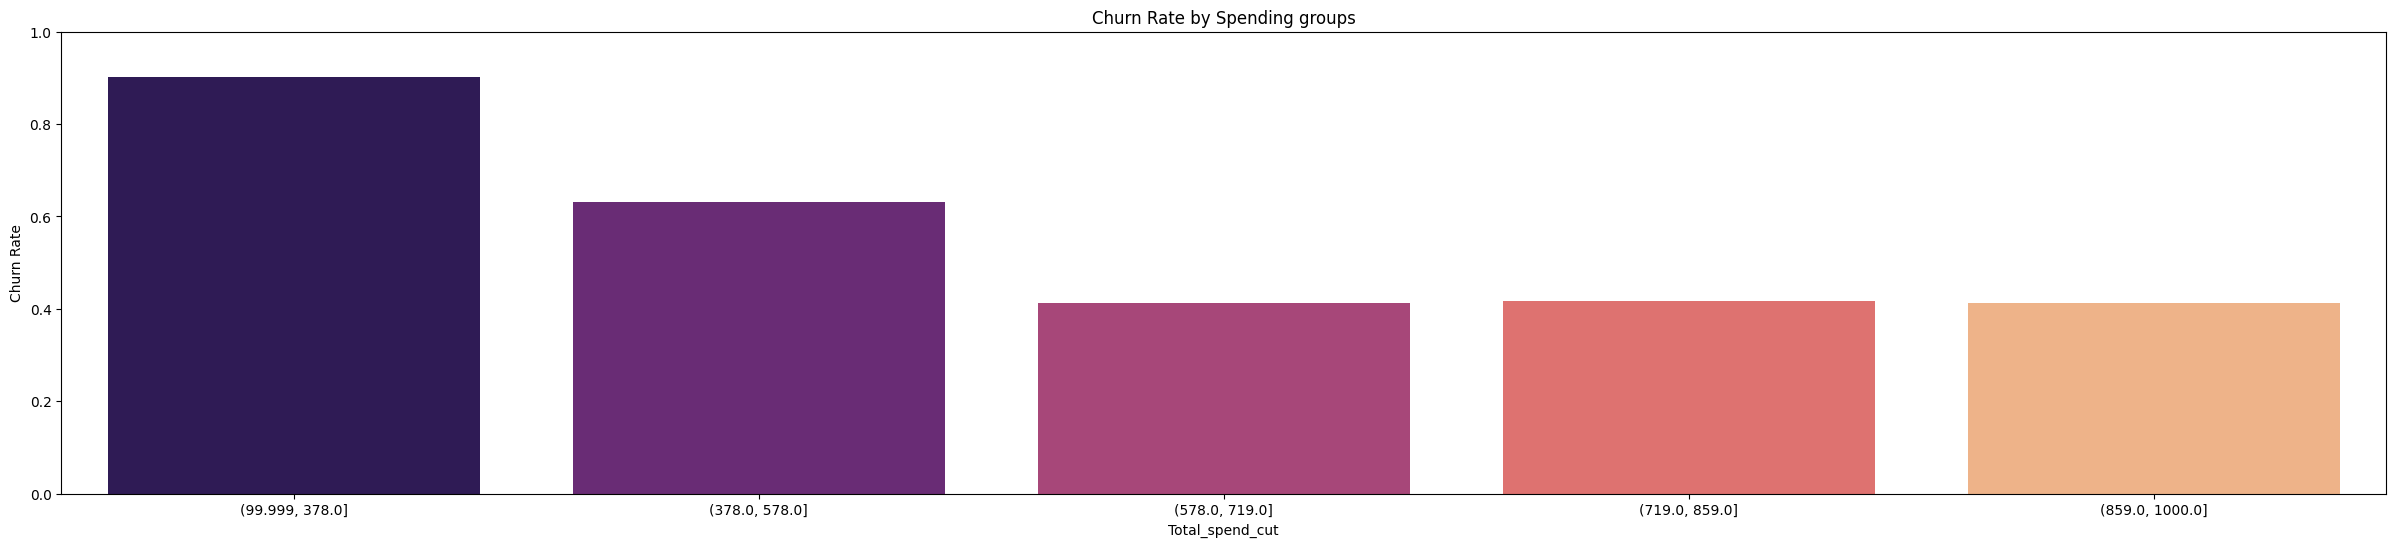

In [51]:
plt.figure(figsize=(30, 6))
sns.barplot(x='Total_spend_cut', y='Churn', data= spend_cut, palette='magma')
plt.title('Churn Rate by Spending groups')
plt.ylabel('Churn Rate')
plt.ylim(0, 1)
plt.show()

In [52]:
df.loc[(df['Total Spend'] > 99.999) & (df['Total Spend'] <= 405.0), 'Total Spend'] = 0
df.loc[(df['Total Spend'] > 405.0) & (df['Total Spend'] <= 592.774), 'Total Spend'] = 1
df.loc[(df['Total Spend'] > 592.774) & (df['Total Spend'] <= 728.72), 'Total Spend'] = 2
df.loc[(df['Total Spend'] > 728.72) & (df['Total Spend'] <= 863.64), 'Total Spend'] = 3
df.loc[(df['Total Spend'] > 863.64), 'Total Spend'] = 4


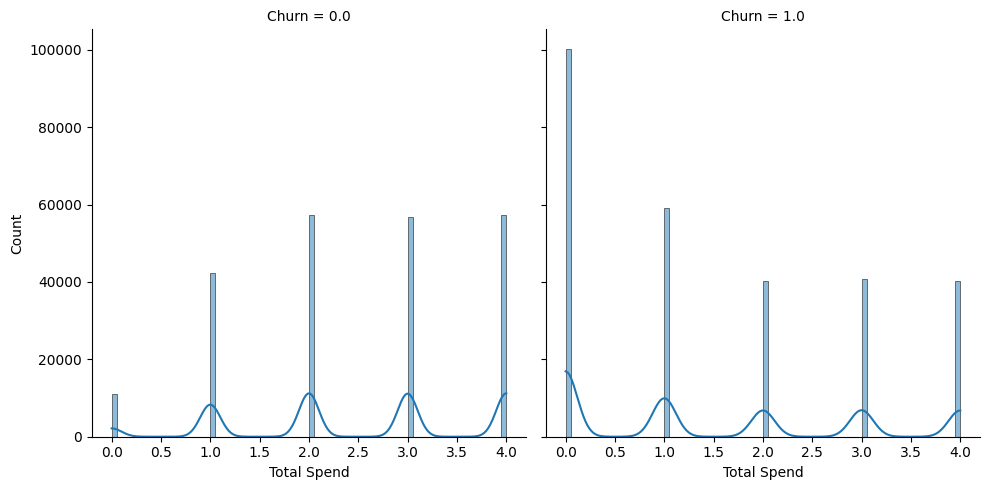

<Figure size 1000x600 with 0 Axes>

In [53]:
sns.displot(data= df, x= df['Total Spend'], col= df['Churn'], kde= True)
plt.figure(figsize=(10, 6))
plt.show()

In [54]:
spend_cut=df.groupby(['Total Spend'], as_index= False)['Churn'].mean()
spend_cut

,Total Spend,Churn
0,0.0,0.901288
1,1.0,0.582194
2,2.0,0.413034
3,3.0,0.417219
4,4.0,0.412687


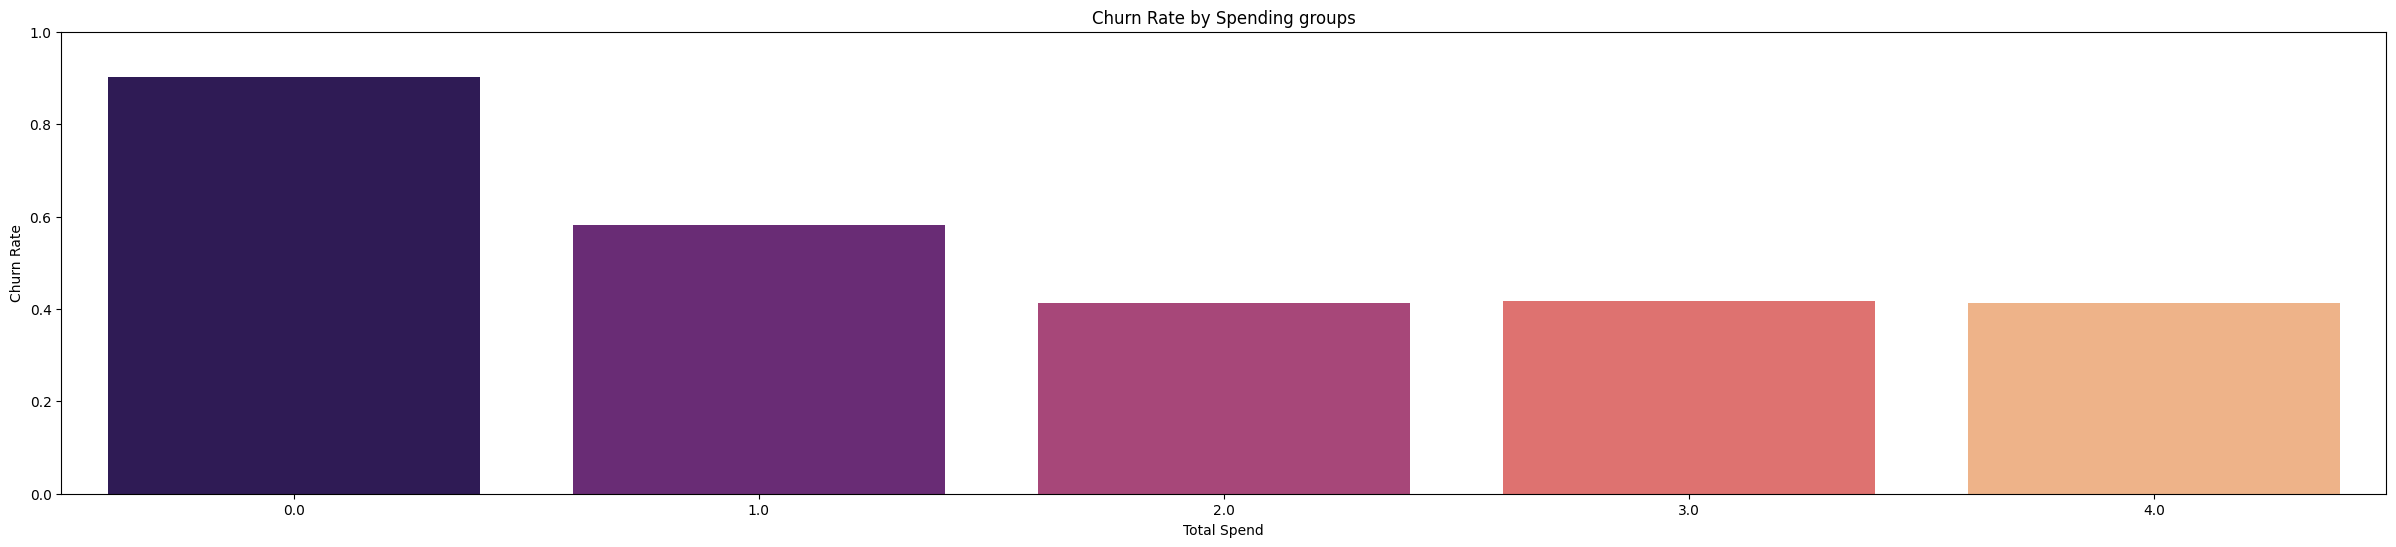

In [55]:
plt.figure(figsize=(30, 6))
sns.barplot(x='Total Spend', y='Churn', data= spend_cut, palette='magma')
plt.title('Churn Rate by Spending groups')
plt.ylabel('Churn Rate')
plt.ylim(0, 1)
plt.show()

# Lets see how our data has changed now.

In [56]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 505206 entries, 0 to 505206
Data columns (total 16 columns):
 #   Column                 Non-Null Count   Dtype   
---  ------                 --------------   -----   
 0   CustomerID             505206 non-null  float64 
 1   Age                    505206 non-null  float64 
 2   Gender                 505206 non-null  object  
 3   Tenure                 505206 non-null  float64 
 4   Usage Frequency        505206 non-null  float64 
 5   Support Calls          505206 non-null  float64 
 6   Payment Delay          505206 non-null  float64 
 7   Subscription Type      505206 non-null  object  
 8   Contract Length        505206 non-null  object  
 9   Total Spend            505206 non-null  float64 
 10  Last Interaction       505206 non-null  float64 
 11  Churn                  505206 non-null  float64 
 12  Subscription_Contract  505206 non-null  object  
 13  Age_Cut                505206 non-null  category
 14  Tenure_groups          50

Let's Drop Auxillary columns which were created for column analysis and also drop columns which are not required anymore

In [57]:
Aux_cols= ['Age_Cut','Total_spend_cut', 'Tenure_groups']
Irr_cols= ['CustomerID', 'Subscription Type', 'Contract Length']

In [58]:
df=df.drop(columns= Aux_cols, axis=1)
df=df.drop(columns= Irr_cols, axis=1)


In [59]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 505206 entries, 0 to 505206
Data columns (total 10 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   Age                    505206 non-null  float64
 1   Gender                 505206 non-null  object 
 2   Tenure                 505206 non-null  float64
 3   Usage Frequency        505206 non-null  float64
 4   Support Calls          505206 non-null  float64
 5   Payment Delay          505206 non-null  float64
 6   Total Spend            505206 non-null  float64
 7   Last Interaction       505206 non-null  float64
 8   Churn                  505206 non-null  float64
 9   Subscription_Contract  505206 non-null  object 
dtypes: float64(8), object(2)
memory usage: 42.4+ MB


<Axes: >

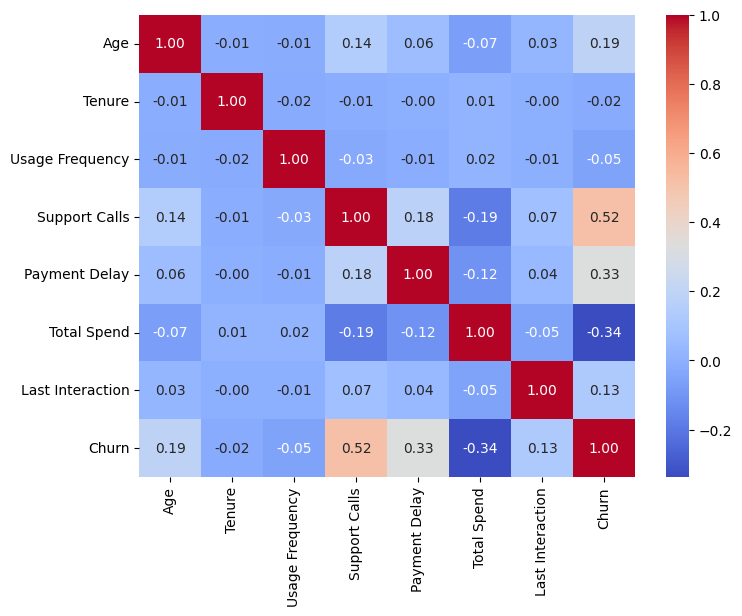

In [60]:
correlation_matrix = df.corr(numeric_only=True)


plt.figure(figsize=(8, 6))  
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")

Although, tenure and usage frequency do have very low correlation with Churn, one should also observe how less they are correlated with other columns too. We opt not to drop these to columns as they might provide some useful info in some context (for e.g as seen before, customers with high usage frequency tend to have a comparatively low churn rate) 

Checking for outliers

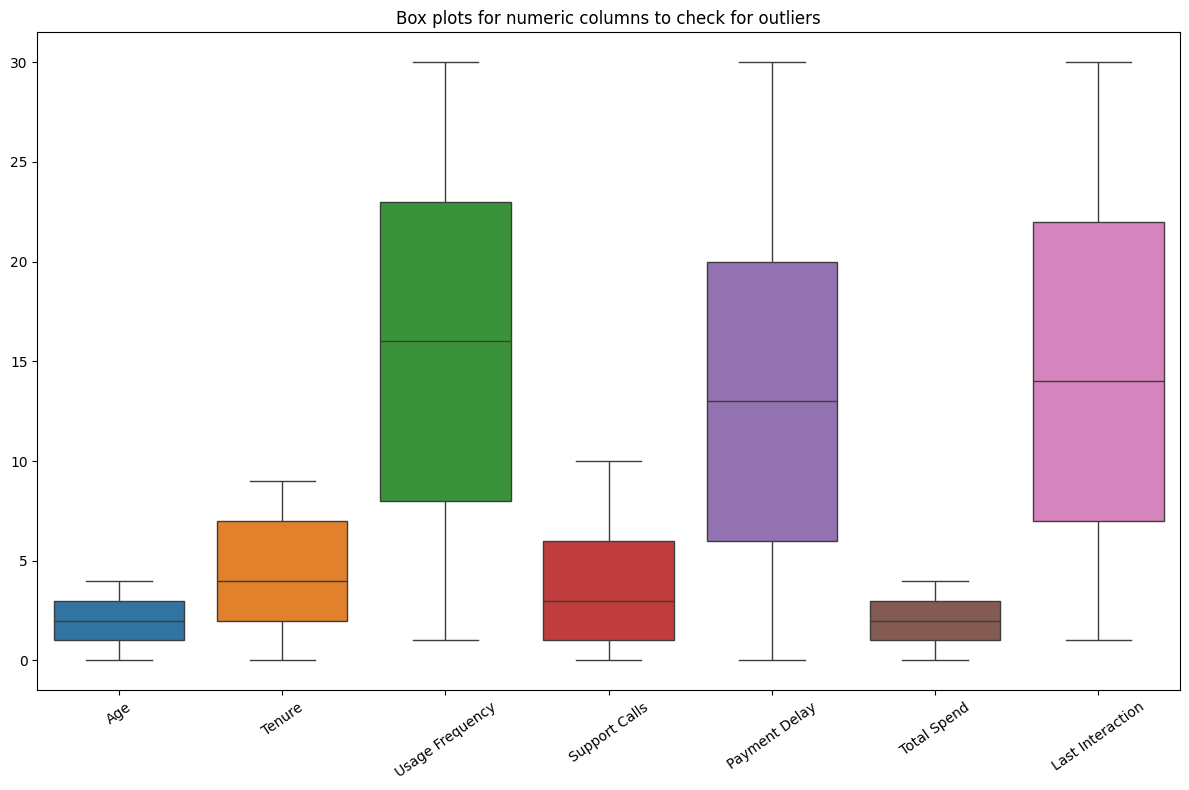

In [85]:
numerical_features = ['Age', 'Tenure', 'Usage Frequency', 'Support Calls', 'Payment Delay', 'Total Spend', 'Last Interaction']
plt.figure(figsize=(12, 8))
sns.boxplot(data=df[numerical_features])


plt.title('Box plots for numeric columns to check for outliers')

plt.xticks(rotation=35)  
plt.tight_layout()
plt.show()



No outliers found

And so we move onto the model training phase

# ***Training Models***

### Model Training Approach

In this project, we are training all models through a systematic approach using **pipelines** and **grid search for hyperparameter tuning** to streamline the workflow and optimize model performance.

1. **Pipelines**: We utilize scikit-learn’s `Pipeline` class to encapsulate each model along with any preprocessing steps required for that model. This ensures that each model follows the same sequence of preprocessing, feature engineering, and training steps, making the process more organized and less prone to errors. Pipelines also help prevent data leakage by applying transformations to the training data and test data consistently.

2. **Grid Search for Hyperparameter Tuning**: For each model, we define a set of hyperparameters to explore using `GridSearchCV`. This allows us to systematically search through various combinations of hyperparameters to find the optimal settings for each model. Grid search uses cross-validation to evaluate model performance across different splits of the data, giving us a robust measure of model effectiveness for each parameter combination.

3. **Finding Optimal Models**: By combining pipelines with grid search, we can efficiently test multiple models and their corresponding hyperparameters, ensuring a comprehensive evaluation of model performance. The grid search returns the best model with the highest performance metrics based on our evaluation criteria, which we then use as our optimal model.

This approach enables us to maintain a scalable and reproducible workflow while optimizing model accuracy, reducing overfitting, and achieving consistent preprocessing across all models.


**Note:** Models such as Support Vector Machines (SVM) and Random Forest, which are computationally intensive, have been trained without hyperparameter tuning due to the extremely long computation time required on such a large dataset.**Note:** Models such as Support Vector Machines (SVM) and Random Forest, which are computationally intensive, have been trained without hyperparameter tuning due to the extremely long computation time required on such a large dataset. As a result, we opted to use default hyperparameters for these models to balance performance with computational efficiency.



# *Initial Setup* 

In [61]:
X = df.drop('Churn', axis=1)
y = df['Churn']

### Split Approach
We will use a two-step split approach:

1. **Train-Test Split**: First, we split the data into training and testing sets while preserving the class distribution using `stratify=y`.
2. **Train-Validation Split**: Next, we split the training set into train and validation sets, again ensuring class balance with `stratify=y_train`.



In [62]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, 
    test_size=0.2,  
    random_state=42,  
    stratify=y  
)

X_train_final, X_val, y_train_final, y_val = train_test_split(
    X_train, y_train, 
    test_size=0.2,  
    random_state=42,  
    stratify=y_train 
)


In [64]:
numerical_features = ['Age', 'Tenure', 'Usage Frequency', 'Support Calls', 'Payment Delay', 'Total Spend', 'Last Interaction']
categorical_features_ohe = ['Gender']
categorical_features_ord= ['Subscription_Contract']

# *Pipelines*


In [65]:
num_pipeline= Pipeline(steps= [
    ('scale' , StandardScaler())
])

In [66]:
ord_pipeline= Pipeline(steps= [
    ('ordinal', OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1, categories=[
        
        ['Bsc-Mon', 'Bsc-Qua', 'Bsc-Ann', 'Std-Mon', 'Std-Qua', 'Std-Ann','Prm-Mon', 'Prm-Qua', 'Prm-Ann']]))
])

In [67]:
ohe_pipeline= Pipeline(steps= [
    ('one-hot', OneHotEncoder(handle_unknown='ignore', sparse_output= False))
])

In [68]:
column_transformer= ColumnTransformer(transformers= [
    ('numeric_pipeline', num_pipeline, numerical_features),
    ('one_hot_pipeline', ohe_pipeline, categorical_features_ohe),
    ('ordinal_pipeline', ord_pipeline, categorical_features_ord)
    ],
    remainder= 'drop',
    n_jobs= -1
)

# *Model Trainings*

# Model 1: **Gaussian Naive Bayes**

In [70]:
gnb= GaussianNB()

In [71]:
param_grid_nb = {
    'var_smoothing': [1e-11, 1e-10, 1e-9, 1e-8, 1e-7, 1e-6, 1e-5]
}

In [73]:
CV_gnb= GridSearchCV(estimator=gnb, param_grid=param_grid_nb, cv= StratifiedKFold(n_splits=3))

In [74]:
final_gnb_pipe= make_pipeline(column_transformer, CV_gnb)
final_gnb_pipe.fit(X_train_final, y_train_final)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(n_jobs=-1,
                                   transformers=[('numeric_pipeline',
                                                  Pipeline(steps=[('scale',
                                                                   StandardScaler())]),
                                                  ['Age', 'Tenure',
                                                   'Usage Frequency',
                                                   'Support Calls',
                                                   'Payment Delay',
                                                   'Total Spend',
                                                   'Last Interaction']),
                                                 ('one_hot_pipeline',
                                                  Pipeline(steps=[('one-hot',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  [...
                                                                                               'Bsc-Qua',
                                                                                               'Bsc-Ann',
                                                                                               'Std-Mon',
                                                                                               'Std-Qua',
                                                                                               'Std-Ann',
                                                                                               'Prm-Mon',
                                                                                               'Prm-Qua',
                                                                                               'Prm-Ann']],
                                                                                  handle_unknown='use_encoded_value',
                                                                                  unknown_value=-1))]),
                                                  ['Subscription_Contract'])])),
                ('gridsearchcv',
                 GridSearchCV(cv=StratifiedKFold(n_splits=3, random_state=None, shuffle=False),
                              estimator=GaussianNB(),
                              param_grid={'var_smoothing': [1e-11, 1e-10, 1e-09,
                                                            1e-08, 1e-07, 1e-06,
                                                            1e-05]}))])

**Validation Score**

In [75]:
final_gnb_pipe.score(X_val, y_val)

0.8422179060532209

**Testing Score**

In [76]:
final_gnb_pipe.score(X_test, y_test)

0.8421151600324618

In [90]:
print(CV_gnb.best_score_)
print(CV_gnb.best_params_)

0.840482353996369
{'var_smoothing': 1e-11}


# Model 2: *`K-Neighbors Classifier`*


In [86]:
knn= KNeighborsClassifier()

In [87]:
param_grid_knn = {
    'n_neighbors': [3, 5, 7, 9, 11],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan', 'minkowski']
}


In [88]:
CV_knn= GridSearchCV(estimator= knn, param_grid= param_grid_knn, cv= StratifiedKFold(n_splits=3))

In [89]:
final_knn_pipeline= make_pipeline(column_transformer, CV_knn)
final_knn_pipeline.fit(X_train_final, y_train_final)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(n_jobs=-1,
                                   transformers=[('numeric_pipeline',
                                                  Pipeline(steps=[('scale',
                                                                   StandardScaler())]),
                                                  ['Age', 'Tenure',
                                                   'Usage Frequency',
                                                   'Support Calls',
                                                   'Payment Delay',
                                                   'Total Spend',
                                                   'Last Interaction']),
                                                 ('one_hot_pipeline',
                                                  Pipeline(steps=[('one-hot',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  [...
                                                                                               'Prm-Qua',
                                                                                               'Prm-Ann']],
                                                                                  handle_unknown='use_encoded_value',
                                                                                  unknown_value=-1))]),
                                                  ['Subscription_Contract'])])),
                ('gridsearchcv',
                 GridSearchCV(cv=StratifiedKFold(n_splits=3, random_state=None, shuffle=False),
                              estimator=KNeighborsClassifier(),
                              param_grid={'metric': ['euclidean', 'manhattan',
                                                     'minkowski'],
                                          'n_neighbors': [3, 5, 7, 9, 11],
                                          'weights': ['uniform',
                                                      'distance']}))])

**Validation Score**

In [92]:
final_knn_pipeline.score(X_val, y_val)

0.8955006000024742

**Testing Score**

In [93]:
final_knn_pipeline.score(X_test, y_test)

0.8976366263533976

In [94]:
print(CV_knn.best_score_)
print(CV_knn.best_params_)

0.8915445781567496
{'metric': 'euclidean', 'n_neighbors': 9, 'weights': 'distance'}


# Model 3: *`RandomForest`*

In [121]:
rf= RandomForestClassifier(random_state=42, n_estimators=120, criterion='entropy', min_samples_split=2, min_samples_leaf=1, bootstrap=True)

In [122]:
final_rf_pipeline= make_pipeline(column_transformer, rf)

In [123]:
final_rf_pipeline.fit(X_train_final, y_train_final)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(n_jobs=-1,
                                   transformers=[('numeric_pipeline',
                                                  Pipeline(steps=[('scale',
                                                                   StandardScaler())]),
                                                  ['Age', 'Tenure',
                                                   'Usage Frequency',
                                                   'Support Calls',
                                                   'Payment Delay',
                                                   'Total Spend',
                                                   'Last Interaction']),
                                                 ('one_hot_pipeline',
                                                  Pipeline(steps=[('one-hot',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  [...
                                                 ('ordinal_pipeline',
                                                  Pipeline(steps=[('ordinal',
                                                                   OrdinalEncoder(categories=[['Bsc-Mon',
                                                                                               'Bsc-Qua',
                                                                                               'Bsc-Ann',
                                                                                               'Std-Mon',
                                                                                               'Std-Qua',
                                                                                               'Std-Ann',
                                                                                               'Prm-Mon',
                                                                                               'Prm-Qua',
                                                                                               'Prm-Ann']],
                                                                                  handle_unknown='use_encoded_value',
                                                                                  unknown_value=-1))]),
                                                  ['Subscription_Contract'])])),
                ('randomforestclassifier',
                 RandomForestClassifier(criterion='entropy', n_estimators=120,
                                        random_state=42))])

**Validation score**

In [124]:
final_rf_pipeline.score(X_val, y_val)

0.9261316541511512

**Testing score**

In [125]:
final_rf_pipeline.score(X_test,  y_test)

0.9273668375527009

# Model 4: *`AdaBoost`*


In [134]:
base_estimator = DecisionTreeClassifier(criterion='entropy', 
                                        max_depth=None, 
                                        min_samples_split=2, 
                                        min_samples_leaf=1)


adb = AdaBoostClassifier(base_estimator, 
                        n_estimators=50,    
                        learning_rate=1.0,  
                        random_state=42)

In [135]:
final_adb_pipeline= make_pipeline(column_transformer, adb)

In [136]:
final_adb_pipeline.fit(X_train_final, y_train_final)


Pipeline(steps=[('columntransformer',
                 ColumnTransformer(n_jobs=-1,
                                   transformers=[('numeric_pipeline',
                                                  Pipeline(steps=[('scale',
                                                                   StandardScaler())]),
                                                  ['Age', 'Tenure',
                                                   'Usage Frequency',
                                                   'Support Calls',
                                                   'Payment Delay',
                                                   'Total Spend',
                                                   'Last Interaction']),
                                                 ('one_hot_pipeline',
                                                  Pipeline(steps=[('one-hot',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  [...
                                                 ('ordinal_pipeline',
                                                  Pipeline(steps=[('ordinal',
                                                                   OrdinalEncoder(categories=[['Bsc-Mon',
                                                                                               'Bsc-Qua',
                                                                                               'Bsc-Ann',
                                                                                               'Std-Mon',
                                                                                               'Std-Qua',
                                                                                               'Std-Ann',
                                                                                               'Prm-Mon',
                                                                                               'Prm-Qua',
                                                                                               'Prm-Ann']],
                                                                                  handle_unknown='use_encoded_value',
                                                                                  unknown_value=-1))]),
                                                  ['Subscription_Contract'])])),
                ('adaboostclassifier',
                 AdaBoostClassifier(estimator=DecisionTreeClassifier(criterion='entropy'),
                                    random_state=42))])

In [137]:
final_adb_pipeline.score(X_val, y_val)

0.8679499709277152

In [138]:
final_adb_pipeline.score(X_test, y_test)

0.8705686744126205

# Model 5: *`Support Vector Machine`*


In [140]:
svm= SVC()

In [141]:
final_svm_pipeline= make_pipeline(column_transformer, svm)

In [142]:
final_svm_pipeline.fit(X_train_final, y_train_final)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(n_jobs=-1,
                                   transformers=[('numeric_pipeline',
                                                  Pipeline(steps=[('scale',
                                                                   StandardScaler())]),
                                                  ['Age', 'Tenure',
                                                   'Usage Frequency',
                                                   'Support Calls',
                                                   'Payment Delay',
                                                   'Total Spend',
                                                   'Last Interaction']),
                                                 ('one_hot_pipeline',
                                                  Pipeline(steps=[('one-hot',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  ['Gender']),
                                                 ('ordinal_pipeline',
                                                  Pipeline(steps=[('ordinal',
                                                                   OrdinalEncoder(categories=[['Bsc-Mon',
                                                                                               'Bsc-Qua',
                                                                                               'Bsc-Ann',
                                                                                               'Std-Mon',
                                                                                               'Std-Qua',
                                                                                               'Std-Ann',
                                                                                               'Prm-Mon',
                                                                                               'Prm-Qua',
                                                                                               'Prm-Ann']],
                                                                                  handle_unknown='use_encoded_value',
                                                                                  unknown_value=-1))]),
                                                  ['Subscription_Contract'])])),
                ('svc', SVC())])

In [143]:
final_svm_pipeline.score(X_val, y_val)

0.9000284537255824

### Summary and Conclusion

Based solely on accuracy as the initial evaluation metric, **Random Forest**, and **SVM** were selected as the best-performing model. Their high accuracies made them the most promising candidate for further analysis and validation.

Moving forward, we will perform a detailed evaluation of the chosen models to explore their capabilities further. This will include assessing additional performance metrics such as:

- **Confusion Matrix**: To understand the model’s predictions in terms of true positives, true negatives, false positives, and false negatives.
- **Precision, Recall, and F1-Score**: To evaluate the balance between precision and recall.
- **ROC-AUC Curve**: To measure the model's ability to distinguish between classes at various thresholds.


These evaluations will provide deeper insights into the performance and reliability of the Random Forest and SVM models. 
The overall better performing model across all metrics will be chosen as our final model..